In [1]:
import sys
sys.path.append('../src')

from module.module import Linear, Conv1D, MaxPool1D, Flatten
from module.activation import TanH, Sigmoide, ReLU

from loss.loss import CrossEntropie, CELogSoftmax
from networks.optim import Optim
from networks.sequentiel import Sequentiel

from utils.processing import one_hot_y
from utils.plots import plot_net, classification_report

import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
dt = pd.read_csv("../data/fashion-mnist_train.csv")

X = dt.drop(["label"], axis=1).values
y = dt["label"].values

X = (X - X.min(axis=1, keepdims=True)) / (X.max(axis=1, keepdims=True) - X.min(axis=1, keepdims=True))

indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

In [3]:
X_train = X[:10_000]
y_train = y[:10_000]

X_test = X[10_000:14_000]
y_test = y[10_000:14_000]

In [4]:
classes = len(np.unique(y))

input_neurons = X_train.shape[1]
output_neurons = classes

In [5]:
y_one_hot = one_hot_y(y_train, classes)

In [6]:
y_one_hot.shape

(10000, 10)

In [7]:
X_conv = X_train[:,:,np.newaxis]
X_conv.shape

(10000, 784, 1)

100%|██████████| 70/70 [1:32:39<00:00, 79.43s/it]


Training completed.


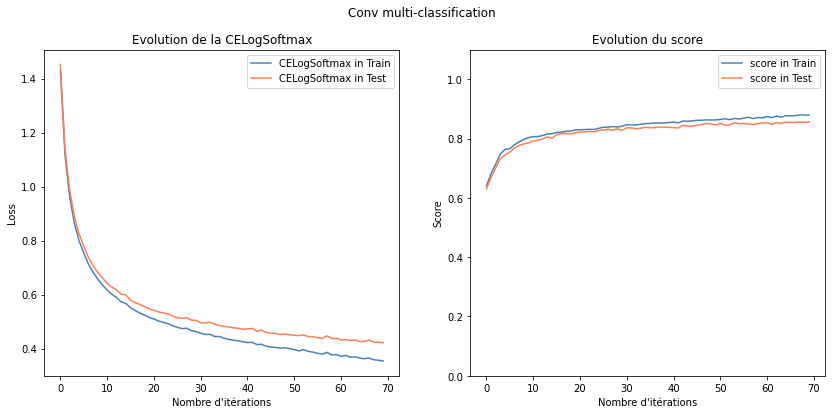

In [8]:
np.random.seed(42)

net = Sequentiel([
    Conv1D(k_size=3, chan_in=1, chan_out=32, stride=2, init="xavier"),
    MaxPool1D(2, 2), 
    Flatten(),
    Linear(6240, 3000, init="xavier"),
    ReLU(),
    Linear(3000, 500, init="xavier"),
    ReLU(),
    Linear(500, 100, init="xavier"),
    ReLU(),
    Linear(100, 10, init="xavier"),
], classes_type="multi")

optim = Optim(net, CELogSoftmax(), eps=1e-5)
optim.SGD(X_conv, y_one_hot, test_train_split=True, batch_size=50, epochs=70, verbose=False)

plot_net(optim, X_conv, y_one_hot, net_type="multiclass", net_title="Conv multi-classification")

In [9]:
net.score(X_test[:,:,np.newaxis], y_test)

0.84275

In [13]:
yhat = net.predict(X_test[:,:,np.newaxis])

In [15]:
yhat = yhat.reshape(-1)

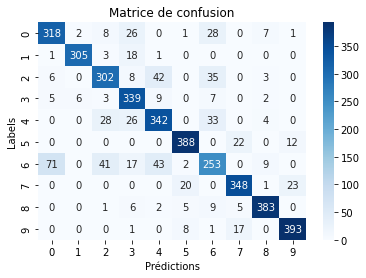

In [16]:
df = classification_report(y_test, yhat, [f"{i}" for i in range(classes)])

In [17]:
print(df.to_latex(float_format="{:.2f}".format))

\begin{tabular}{lrllr}
\toprule
{} &  precision & recall & f1-score &  support \\
class    &            &        &          &          \\
\midrule
0        &       0.79 &   0.81 &     0.80 &      391 \\
1        &       0.97 &   0.93 &     0.95 &      328 \\
2        &       0.78 &   0.76 &     0.77 &      396 \\
3        &       0.77 &   0.91 &     0.83 &      371 \\
4        &       0.78 &   0.79 &     0.78 &      433 \\
5        &       0.92 &   0.92 &     0.92 &      422 \\
6        &       0.69 &   0.58 &     0.63 &      436 \\
7        &       0.89 &   0.89 &     0.89 &      392 \\
8        &       0.94 &   0.93 &     0.93 &      411 \\
9        &       0.92 &   0.94 &     0.93 &      420 \\
accuracy &       0.84 &        &          &     4000 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_37318/2413356786.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(float_format="{:.2f}".format))
